## Assignment 4
### Soumil Gupta 2022102035

### Importing necessary libraries

In [1]:
import cv2
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt
import math
import os

### Setting up directory path

In [5]:
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
media_import_dir = os.path.join(current_dir, 'images')
print(media_import_dir)

c:\Users\soumi\Desktop\College\Semester 5\DIP\a4-zyx7k
c:\Users\soumi\Desktop\College\Semester 5\DIP\a4-zyx7k\images


#### Task 1: Image Segmentation Using Thresholding

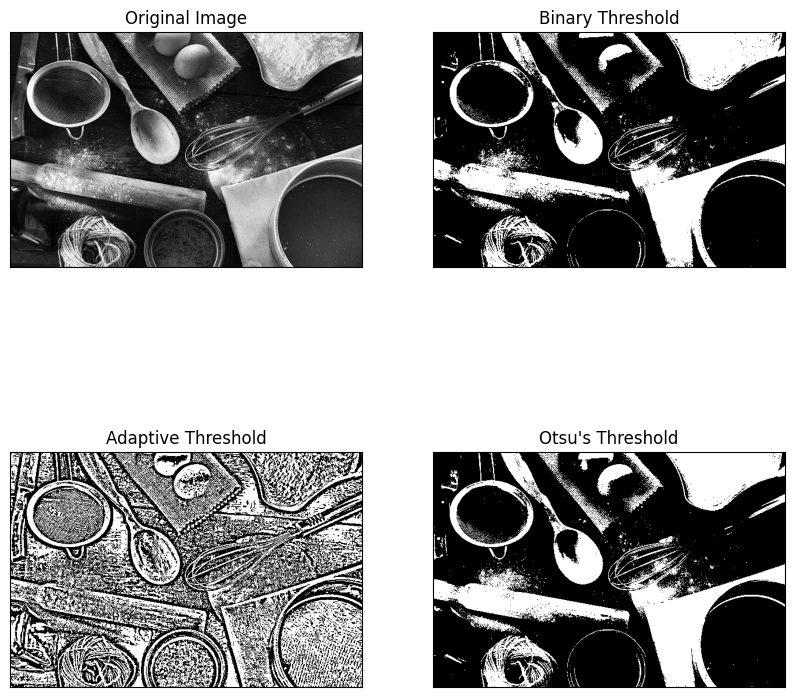

In [7]:
img_path = os.path.join(media_import_dir, 'img1.jpg')
img1 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

ret1, thresh1 = cv2.threshold(
    img1, 127, 255, cv2.THRESH_BINARY)  # Binary Threshold

thresh2 = cv2.adaptiveThreshold(
    img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)  # Adaptive Threshold

ret3, thresh3 = cv2.threshold(
    img1, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)  # Otsu's Threshold

# plot the three images using matplotlib
plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(img1, 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(thresh1, 'gray')
plt.title('Binary Threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(thresh2, 'gray')
plt.title("Adaptive Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(thresh3, 'gray')
plt.title("Otsu's Threshold"), plt.xticks([]), plt.yticks([])
plt.show()

#### (c) Explanation:
Otsu’s Thresholding provided the best segmentation for the image because it automatically determines the optimal threshold value, resulting in clear object boundaries without requiring manual adjustments. While Adaptive Thresholding performed well in handling uneven lighting, it introduced some noise in uniform regions. Binary Thresholding was less effective due to its reliance on a fixed threshold, which failed to account for variations in intensity across the image.


#### Task 2: Line Detection Using Hough Transform

In [12]:
img_path = os.path.join(media_import_dir, 'img2.png')
img2 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [17]:
def lineDetection(img2, threshold=150):
    # Canny edge detector
    dst = cv2.Canny(img2, 50, 200, None, 3)

    # Copy edges to the images that will display the results in BGR
    cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

    # Standard Hough Line Transform
    lines = cv2.HoughLines(dst, 1, np.pi / 180, threshold, None, 0, 0)

    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

    return cdst

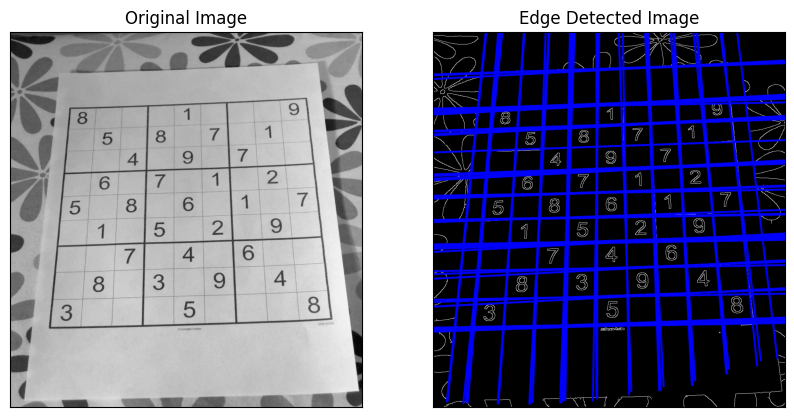

In [28]:
cdst = lineDetection(img2, 150)

# plot the orignal and the edge detected image in color side by side
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img2, 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cdst)
plt.title('Edge Detected Image'), plt.xticks([]), plt.yticks([])
plt.show()

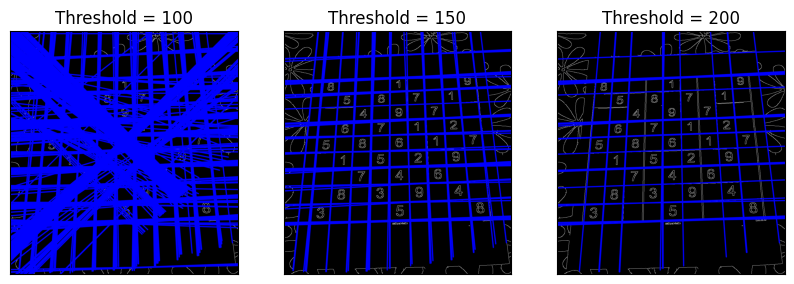

In [29]:
# now plot thje edge detected image for diffeernt thresholds for three differnt values of threshold
cdst = lineDetection(img2, 100)
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(cdst)
plt.title('Threshold = 100'), plt.xticks([]), plt.yticks([])
cdst = lineDetection(img2, 150)
plt.subplot(132), plt.imshow(cdst)
plt.title('Threshold = 150'), plt.xticks([]), plt.yticks([])
cdst = lineDetection(img2, 200)
plt.subplot(133), plt.imshow(cdst)
plt.title('Threshold = 200'), plt.xticks([]), plt.yticks([])
plt.show()

 #### Explanation:
By experimenting with the `threshold` parameter in the Hough Line Transform, it was observed that lowering the threshold value resulted in detecting more lines, including weaker and shorter ones. However, this introduced noise and redundant line detections. Increasing the threshold reduced the noise and highlighted only the most prominent lines but missed some relevant details. A balanced threshold value was found to produce optimal results by retaining the main structural lines while minimizing noise.


#### Task 3: Circle Detection Using Hough Circle Transform

In [98]:
img_path = os.path.join(media_import_dir, 'img3.jpg')
img3 = cv2.imread(img_path, cv2.IMREAD_COLOR)

In [110]:
def circleDetection(img3, param1=200, param2=1,
                    minRadius=10, maxRadius=100):
    
    gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 11)
    rows = gray.shape[0]
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 16,
                               param1=param1, param2=param2,
                               minRadius=minRadius, maxRadius=maxRadius)

    circlesImage = img3.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(circlesImage, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv2.circle(circlesImage, center, radius, (255, 0, 255), 3)

    return circlesImage

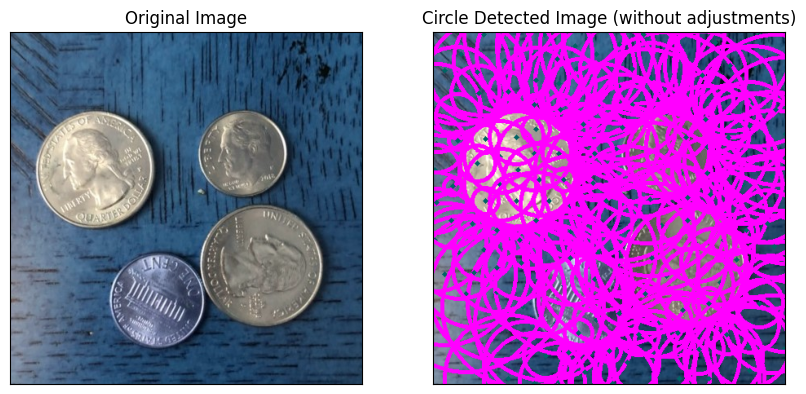

In [113]:
circles = circleDetection(img3)

# plot the orignal and the edge detected image in color side by side
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img3, 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(circles)
plt.title('Circle Detected Image (without adjustments)'), plt.xticks([]), plt.yticks([])
plt.show()

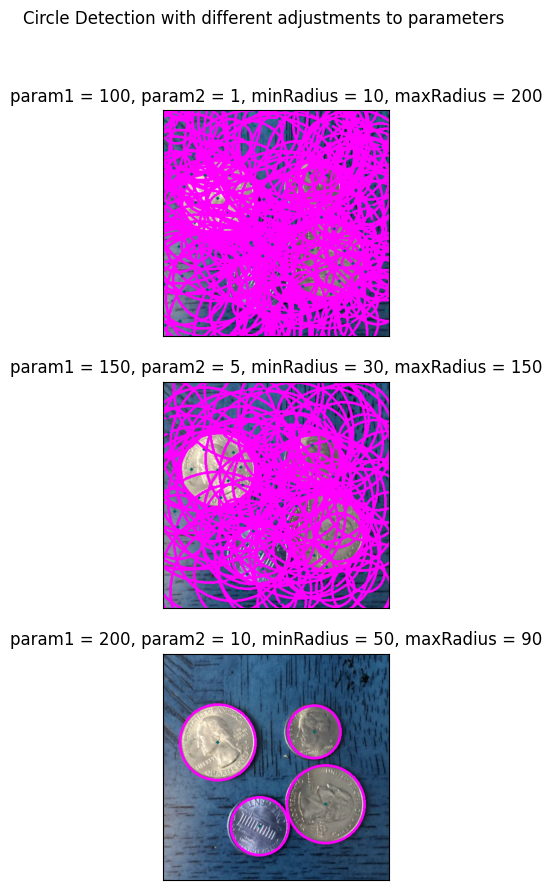

In [118]:
# Write code to plot the circle detected image for different values of param1 and param2 minRadius and maxRadius
circles = circleDetection(img3, 200, 10, 50, 90)
plt.figure(figsize=(10, 10))
plt.subplot(313), plt.imshow(circles)
plt.title('param1 = 200, param2 = 10, minRadius = 50, maxRadius = 90'), plt.xticks([]), plt.yticks([])
circles = circleDetection(img3, 150, 5, 30, 150)
plt.subplot(312), plt.imshow(circles)
plt.title('param1 = 150, param2 = 5, minRadius = 30, maxRadius = 150'), plt.xticks([]), plt.yticks([])
circles = circleDetection(img3, 100, 1, 10, 200)
plt.subplot(311), plt.imshow(circles)
plt.title('param1 = 100, param2 = 1, minRadius = 10, maxRadius = 200'), plt.xticks([]), plt.yticks([])
plt.suptitle('Circle Detection with different adjustments to parameters')
plt.show()


#### explanation

#### Task 4: Harris Corner Detection

In [173]:
img_path = os.path.join(media_import_dir, 'img4.jpg')
img4 = cv2.imread(img_path, cv2.IMREAD_COLOR)

In [174]:
def cornerDetection(img, k):

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    
    # Apply Harris corner detection
    dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=k)
    dst = cv2.dilate(dst, None)  # Dilate to enhance corner points
    
    # Overlay corners on the copied image
    img[dst > 0.01 * dst.max()] = [0, 0, 255]  # Mark corners in red
    
    return img

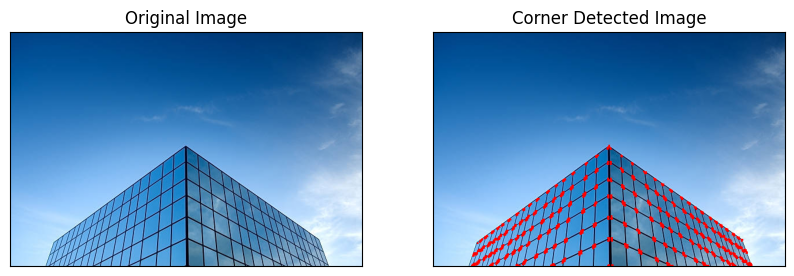

In [175]:
corner_detected_img = cornerDetection(img4.copy(), 0.04)

original_img_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
corner_detected_img_rgb = cv2.cvtColor(corner_detected_img, cv2.COLOR_BGR2RGB)

# Plot the images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(original_img_rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(corner_detected_img_rgb)
plt.title('Corner Detected Image'), plt.xticks([]), plt.yticks([])
plt.show()

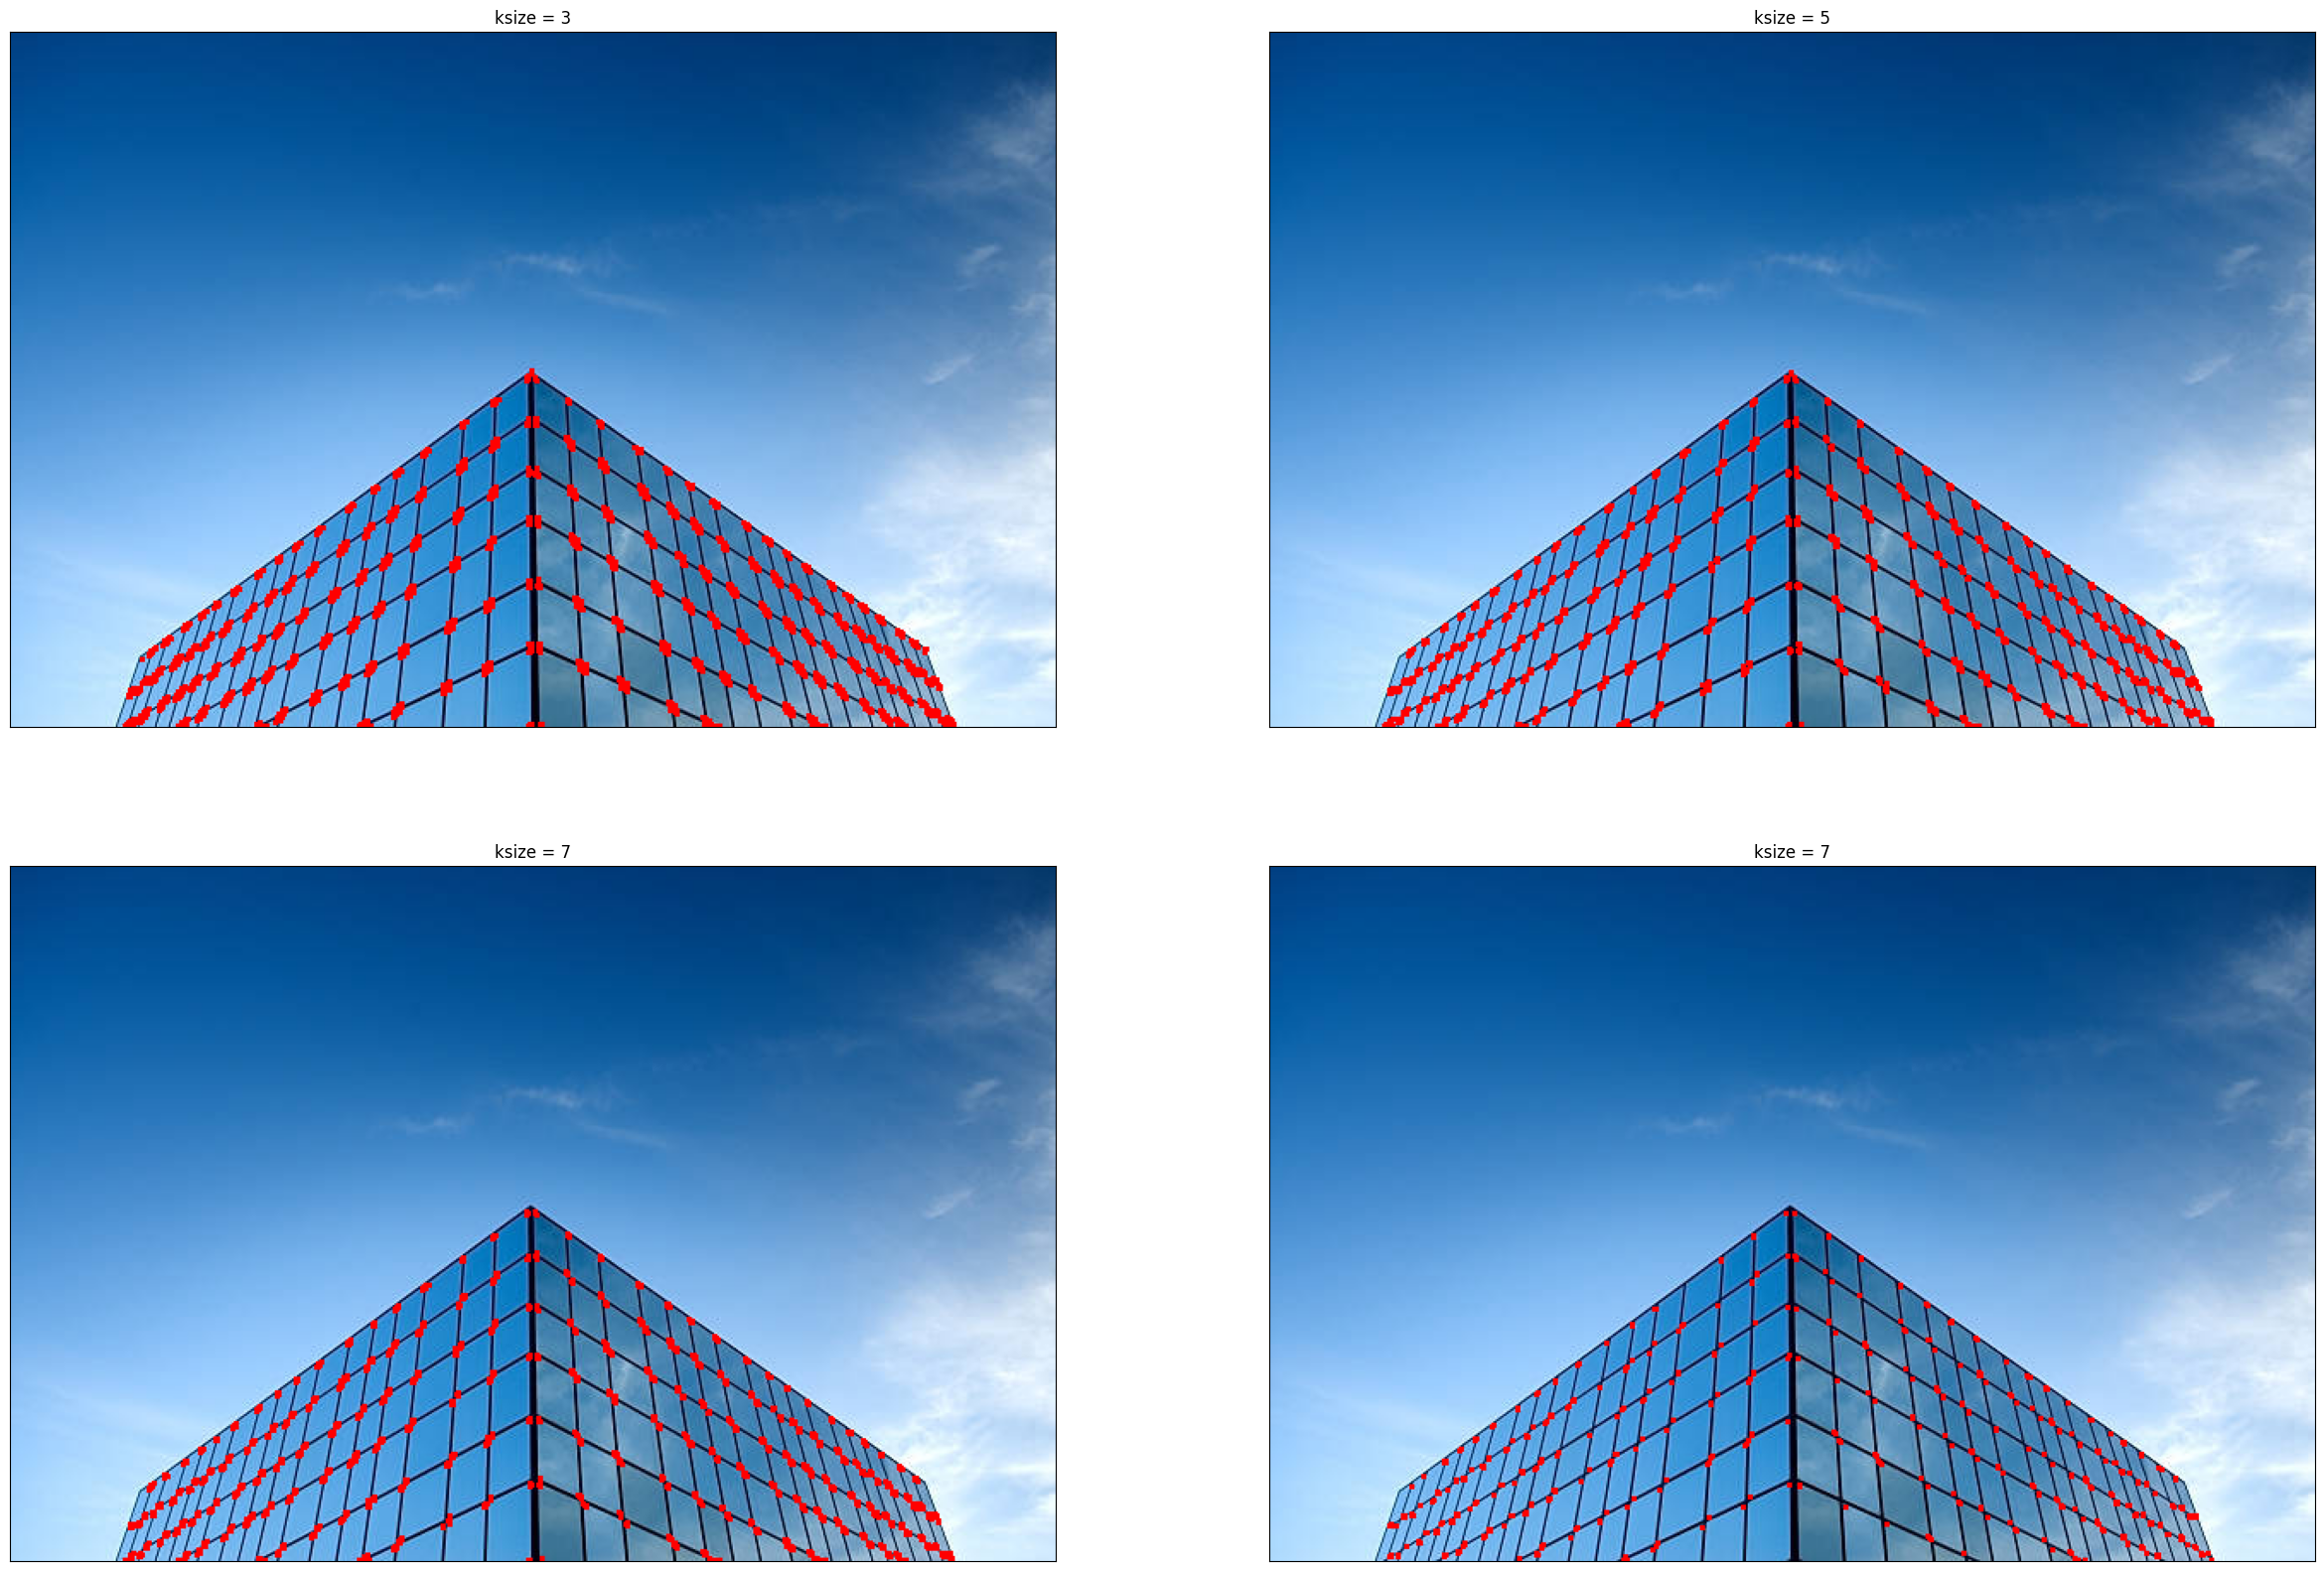

In [191]:
# Plot the images
plt.figure(figsize=(30, 20))
corner_detected_img = cornerDetection(img4.copy(), 0.04)
corner_detected_img_rgb = cv2.cvtColor(corner_detected_img, cv2.COLOR_BGR2RGB)
plt.subplot(221), plt.imshow(corner_detected_img_rgb)
plt.title('ksize = 3'), plt.xticks([]), plt.yticks([])
corner_detected_img = cornerDetection(img4.copy(), 0.08)
corner_detected_img_rgb = cv2.cvtColor(corner_detected_img, cv2.COLOR_BGR2RGB)
plt.subplot(222), plt.imshow(corner_detected_img_rgb)
plt.title('ksize = 5'), plt.xticks([]), plt.yticks([])
corner_detected_img = cornerDetection(img4.copy(), 0.1)
corner_detected_img_rgb = cv2.cvtColor(corner_detected_img, cv2.COLOR_BGR2RGB)
plt.subplot(223), plt.imshow(corner_detected_img_rgb)
plt.title('ksize = 7'), plt.xticks([]), plt.yticks([])
corner_detected_img = cornerDetection(img4.copy(), 0.2)
corner_detected_img_rgb = cv2.cvtColor(corner_detected_img, cv2.COLOR_BGR2RGB)
plt.subplot(224), plt.imshow(corner_detected_img_rgb)
plt.title('ksize = 7'), plt.xticks([]), plt.yticks([])
# plt.suptitle('Corner Detection with different adjustments to ksize')
plt.show()
